# Modelo 1 Lagosta Abreojos

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#Immportamos los datos, reformateamos nombres y establecemos columnas 
sensores = pd.read_csv("sensor_base.csv")
arribos = pd.read_csv("abreojos_langosta.csv")
arribos.drop("Unnamed: 0",axis=1,inplace=True)
arribos.rename(columns={"FECHA AVISO":"ds","PESO DESEMBARCADO":"y"},inplace=True)

sensores["time"] = pd.to_datetime(sensores["time"])
arribos["ds"] = pd.to_datetime(arribos["ds"])

In [ ]:
juntos["semana"] = juntos["time"].dt.isocalendar().week
juntos["semana"] = juntos["semana"].astype(int)
juntos["mes"] = juntos["time"].dt.month
juntos["mes"] = juntos["mes"].astype(int)
juntos["enTemp"] = juntos["semana"].apply(lambda x: 1 if x < 10 or x > 39 else 0)

# Importamos el modelo 

In [238]:
from prophet import Prophet
m = Prophet()
m.fit(juntos)

14:57:43 - cmdstanpy - INFO - Chain [1] start processing
14:57:43 - cmdstanpy - INFO - Chain [1] done processing


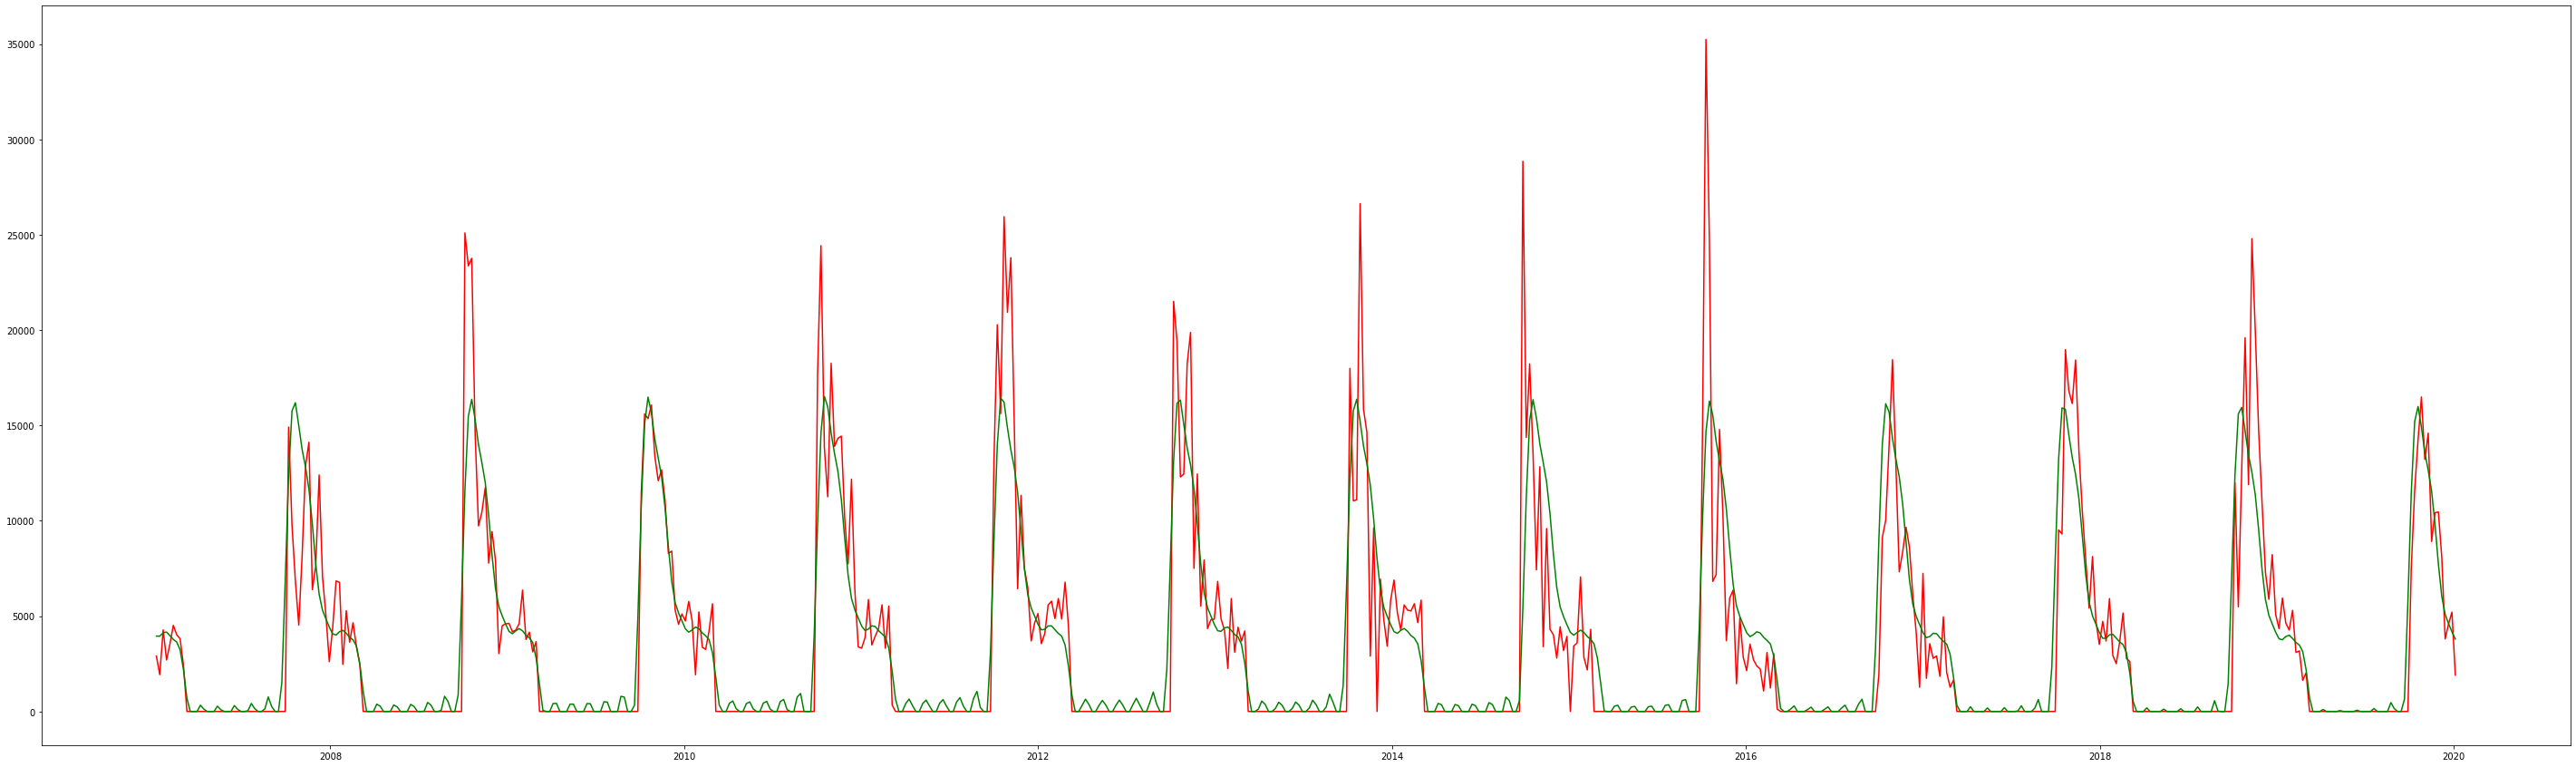

In [239]:
import matplotlib.pyplot as plt
predictions = m.predict()
predictions["yhat"] = predictions["yhat"].apply(lambda x: x if x > 0 else 0)
plt.figure(figsize=(50,15))
#plt.plot(train["ds"],["y"])
plt.plot(juntos["ds"],juntos["y"],c="red")
plt.plot(predictions["ds"],predictions["yhat"],c="green")


# Prueba con datos no vistos

In [ ]:
train = juntos[juntos["ds"] <= "2018-07-30"]
test = juntos[(juntos["ds"] >= "2018-07-30")]

m2 = Prophet()
m2.add_regressor("semana")
m2.add_regressor("mes")
m2.add_regressor("enTemp")
m2.fit(train)

fore = m.predict(test)

fore["yhat"] = fore["yhat"].apply(lambda x: x if x > 0 else 0)


plt.plot(test["ds"],test["y"],c="g")
plt.plot(fore["ds"],fore["yhat"],c="r")

suma_total_real = fore["yhat"].sum()
suma_total_pre = test["y"].sum()

print(abs((suma_total_real-suma_total_pre)/(suma_total_real))*100)

In [ ]:
fore[["yhat","yhat_lower","yhat_upper"]]

In [ ]:
from datetime import datetime, timedelta
start_date = pd.to_datetime('2004-08-01')
end_date = pd.to_datetime('2018-05-25')  # Specify the end date or the desired range
dates = pd.date_range(start=start_date, end=end_date, freq='AS')

# Create a dataframe with dates and a second column filled with zeros
df = pd.DataFrame({'Dates': dates, 'Zeros': 0}) 
df["Dates"] = df["Dates"].apply(lambda x: x + timedelta(weeks=30))
print(df)

In [ ]:
start_date = pd.to_datetime('2004-08-01')
end_date = pd.to_datetime('2018-01-01')  # Specify the end date or the desired range
dates = pd.date_range(start=start_date, end=end_date, freq='AS')

# Create a dataframe with dates and a second column filled with zeros
df = pd.DataFrame({'Dates': dates, 'Zeros': 0}) 
df["Dates"] = df["Dates"].apply(lambda x: x + timedelta(weeks=30))
print(df)

start_date = pd.to_datetime('2004-08-01')
end_date = pd.to_datetime('2018-01-01')  # Specify the end date or the desired range
dates = pd.date_range(start=start_date, end=end_date, freq='AS')

# Create a dataframe with dates and a second column filled with zeros
df2 = pd.DataFrame({'Dates': dates, 'Zeros': 0}) 
df2["Dates"] = df2["Dates"].apply(lambda x: x + timedelta(weeks=70))
print(df2)

In [ ]:
def custom_temporal_crossval(arribos, date_ranges):
    
    seasons = 1
    
    for date in date_ranges.loc[2:,"Dates"]:
        m = Prophet()
        train = arribos[arribos["ds"] <= date]
        
        val = arribos[arribos["ds"]> date].head(40)
        
        m.fit(train)
        future = m.make_future_dataframe(periods=40,freq="W")

        forecast = m.predict(future)
        print("Forecast")
    
        forecast["yhat"] = forecast["yhat"].apply(lambda x: x if x > 0 else 0)
        
        ground_truth = val["y"].sum()
        forecasted_sum = forecast["yhat"].tail(40).sum()
        
        print("Forecasting 40 periods using {} past seasons".format(seasons))
        print("Ground truth: " + str(ground_truth))
        print("Forecsted sum: "+ str(forecasted_sum))
        
        print("Differrence ="+str(forecasted_sum-ground_truth))
        relDif = abs((forecasted_sum-ground_truth)/ground_truth)*100
        print("Relative difference = " + str(relDif))
        
        plt.plot(val["ds"],val["y"],c="g")
        plt.plot(forecast["ds"].tail(40),forecast["yhat"].tail(40),c="r")
        plt.show()
        seasons += 1
    
   
    
    
    

In [ ]:
custom_temporal_crossval(arribos,df)

# Modelo 2 - Abulon Abreojos

In [ ]:

arribos2 = pd.read_csv("abulon.csv")
arribos2.drop("Unnamed: 0",axis=1,inplace=True)
arribos2.rename(columns={"FECHA AVISO":"ds","PESO DESEMBARCADO":"y"},inplace=True)

arribos2["ds"] = pd.to_datetime(arribos2["ds"])
arribos2 = arribos2[arribos2["ds"]>"2005-01-01"]

In [ ]:
m2 = Prophet()
m2.fit(arribos2)

predictions2 = m2.predict()
predictions2["yhat"] = predictions2["yhat"].apply(lambda x: x if x > 0 else 0)
plt.figure(figsize=(50,15))
#plt.plot(train["ds"],["y"])
plt.plot(arribos2["ds"],arribos2["y"],c="red")
plt.plot(predictions2["ds"],predictions2["yhat"],c="green")

# Inferencia

In [ ]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(m)

In [ ]:
date = df.loc[2,"Dates"]

In [ ]:
train = arribos[arribos["ds"] <= "2018-07-30"]
test = arribos[arribos["ds"] >= "2018-07-30"]

m = Prophet()
m.fit(train)
fore = m.predict(test)
fore["yhat"] = fore["yhat"].apply(lambda x: x if x > 0 else 0)

